# Import Libraries

In [1]:
import numpy as np #Library for math
import pandas as pd #Library for files
import matplotlib.pyplot as plt #Library for graphs

# Load Data

In [2]:
path = r'E:\All\Courses\Clarity Vision (To Ai Specialist)\Machine Learning (M.L)\Lecture 4 (10-9)\heart cancer.txt'

data = pd.read_csv(path, header=None, names=['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                                            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

###
"""
Age ==> Age
Sex ==> Gender
cp ==> Chest Pain
trestbps ==> Resting Blood Pressure
chol ==> Serum Cholesterol
fbs ==> Fasting Blood Sugar
restecg ==> Resting Electrocardiogram Results
thalach ==> Greatest Number Of Beats Per Minute
exang ==>  Exercise Induced Angina
oldpeak ==> ST Depression Induced By Exercise Relative To Rest
slope ==> The Slope Of The Peak Exercise ST Segment
ca ==> Number Of Major Vessels (0-3) Colored By Fluoroscopy
thal ==> Thal
target ==> Target Value is 0 (Negative) and 1 (Positive)
"""
###

print("Data: ")
print(data.head(10))
print()
print("Data Describe: ")
print(data.describe())

Data: 
   Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2  

# Rearrange Data

In [3]:
positive = data[data['target'].isin([1])]
negative = data[data['target'].isin([0])]

print("Positive: ")
print(positive)
print("..................................................................................")
print()
print("Negative: ")
print(negative)

Positive: 
     Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
160   56    1   1       120   240    0        1      169      0      0.0   
161   55    0   1       132   342    0        1      166      0      1.2   
162   41    1   1       120   157    0        1      182      0      0.0   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0

# Draw The data on plot (Graph)

Text(0, 0.5, 'chol')

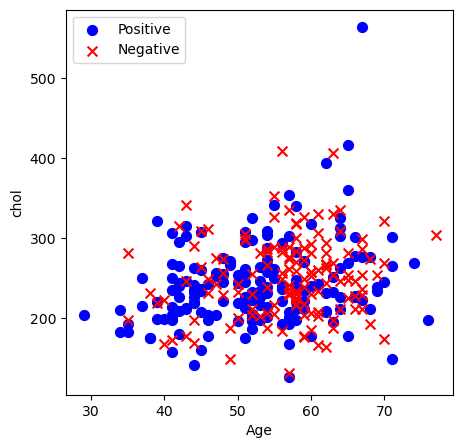

In [4]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(positive['Age'], positive['chol'], s=50, c='b', marker='o', label='Positive') # Positive ==> have heart cancer
ax.scatter(negative['Age'], negative['chol'], s=50, c='r', marker='x', label='Negative') # Negative ==> don't have heart cancer
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("chol")

Text(0, 0.5, 'thalach')

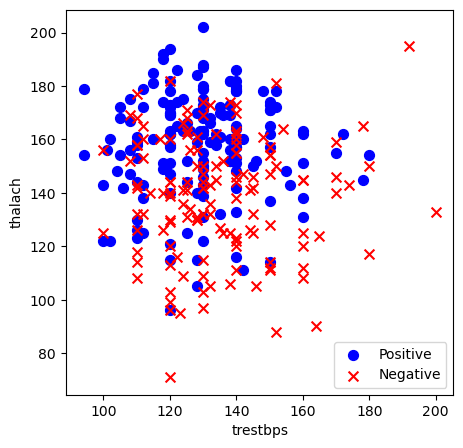

In [5]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(positive['trestbps'], positive['thalach'], s=50, c='b', marker='o', label='Positive') # Positive ==> have heart cancer
ax.scatter(negative['trestbps'], negative['thalach'], s=50, c='r', marker='x', label='Negative') # Negative ==> don't have heart cancer
ax.legend()
ax.set_xlabel("trestbps")
ax.set_ylabel("thalach")

# Sigmoid Function

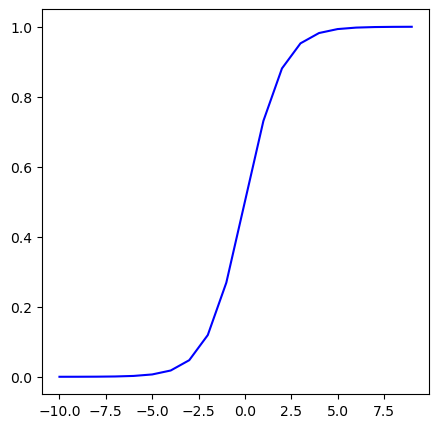

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(nums, sigmoid(nums), 'b')

# Cost Function

In [7]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [8]:
cols = data.shape[1]

X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(13)

print("X_Shape",X.shape)
print("Theta_Shape",theta.shape)
print("Y_Shape",y.shape)

X_Shape (303, 13)
Theta_Shape (13,)
Y_Shape (303, 1)


In [9]:
this_cost = cost(theta, X, y)

print()
print("Cost: ",this_cost)


Cost:  0.6931471805599453


# Gradient descent optimizer

In [10]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [11]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

In [12]:
print(result)

(array([ 0.01277144, -1.63870178,  0.84903885, -0.01533434, -0.00361602,
       -0.0113448 ,  0.54314307,  0.03190402, -0.89179992, -0.49870654,
        0.60939249, -0.77254086, -0.84397418]), 60, 1)


In [13]:
costafteroptimize = cost(result[0], X, y)
print()
print('cost after optimize = ' , costafteroptimize)
print()


cost after optimize =  0.3519324470535561



In [14]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [15]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = round((sum(map(int, correct)) / len(correct)) * 100, 2)
print ('accuracy = {0} %'.format(accuracy))

accuracy = 85.15 %
